<a href="https://colab.research.google.com/github/itishajain15/Bikesharingdemandpreidction/blob/main/Bike_Demand_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter Notes/SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
#making a copy of the original dataset
df1 = df.copy()

In [5]:
df1.shape

(8760, 14)

In [6]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# Converting date into datetime data type.
df1['Date'] = pd.to_datetime(df1['Date'])

In [10]:
# Extracting month,weekday, hour from date
df1['weekday'] = df1.Date.dt.weekday
df1['month'] = df1.Date.dt.month
df1['year'] = df1.Date.dt.year

In [11]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017


In [12]:
df1.drop('Date',axis = True, inplace = True)

In [13]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'weekday', 'month', 'year'],
      dtype='object')

In [14]:
# checking null values
df1.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
weekday                      0
month                        0
year                         0
dtype: int64

No need to remove null values as null values do not even exist

Attribute Information:\
Date : year-month-day\
Rented Bike count - Count of bikes rented at each hour\
Hour - Hour of he day\
Temperature-Temperature in Celsius\
Humidity - %\
Windspeed - m/s\
Visibility - 10m\
Dew point temperature - Celsius\
Solar radiation - MJ/m2\
Rainfall - mm\
Snowfall - cm\
Seasons - Winter, Spring, Summer, Autumn\
Holiday - Holiday/No holiday\
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)\




EXPLORATORY DATA ANALYSIS

Visualize dataset\
  Boxplot and histogram for 'count' column.\
  Scatter the numeric columns with 'count' column.\
  Boxplot the categorical columns with 'count' column.\
  Correlation between each features.\


Plotting Bar graphs to visualize total rental bike count vs different feature values

In [15]:
def barplot (col_name):
  df1.groupby([col_name])['Rented Bike Count'].sum().plot(kind="bar",color='thistle')
  plt.ylabel("Rental Bike count sum * 1e6")
  plt.title("Rented Bike sum vs {}".format(col_name))
  print("Total count of Rented bike count for different {}".format(col_name))

Total count of Rented bike count for different Hour


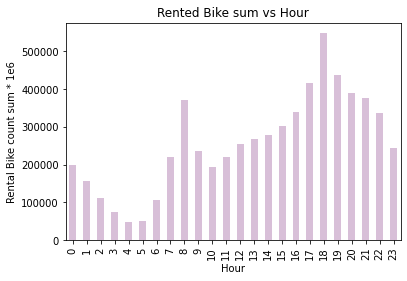

In [16]:
barplot('Hour')

Around morning or evening time, people travel to work or come back from work mostly. So maybe that is why rented bike count is high for those hours.

Total count of Rented bike count for different weekday


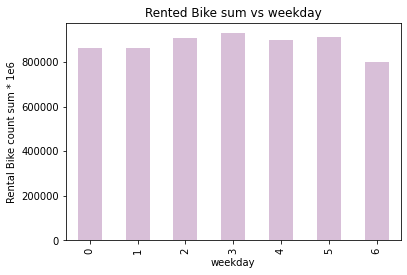

In [17]:
barplot('weekday')

For sundays the rented bikes are used less as compared to other days

Total count of Rented bike count for different month


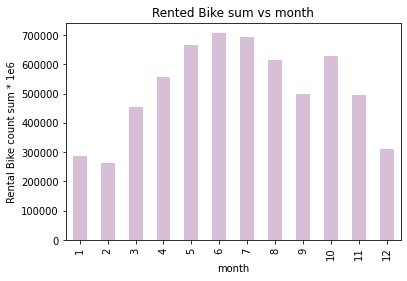

In [18]:
barplot('month')

For cold months the rented bikes are used less as compared to other months.

Total count of Rented bike count for different year


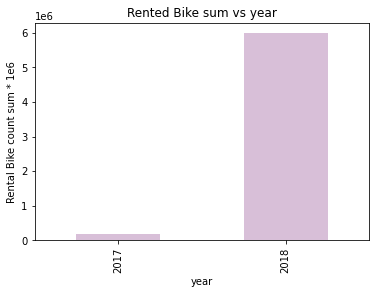

In [19]:
barplot('year')

Most of the data that we have is of 2018.

Plotting line graph to plot Average rented bike count Vs different feature values

In [20]:
# Defining function to check plots for different columns

def line_plot(col_name):
  df1.groupby([col_name])['Rented Bike Count'].mean().plot(kind="line",color='orange')
  plt.ylabel("Average of Rented Bike count")
  plt.title("{} Vs Average Rented Bike Count".format(col_name))
 

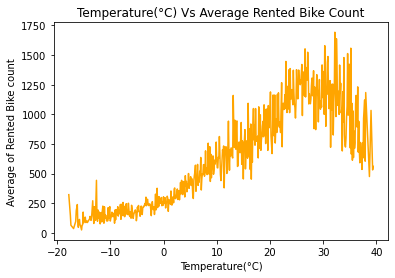

In [21]:
# Average Rented Bike count for various temperatures
line_plot("Temperature(°C)")

As temperature increases so does people rent bikes.

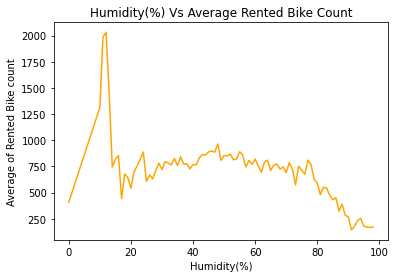

In [22]:
# Average Rented Bike count for various Humidity
line_plot("Humidity(%)")

People doesn't prefer renting bikes when humidity rises over 80%

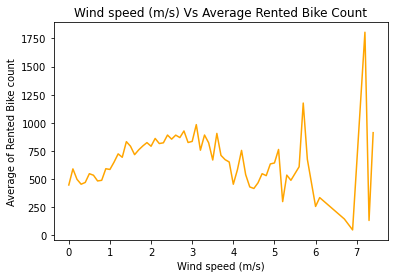

In [23]:
# Average Rented Bike count for different wind speed values
line_plot("Wind speed (m/s)")

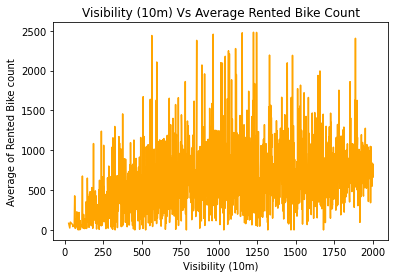

In [24]:
# Average Rented Bike count for different visibility values
line_plot("Visibility (10m)")

Less number of bikes gets rented out when visibility is low

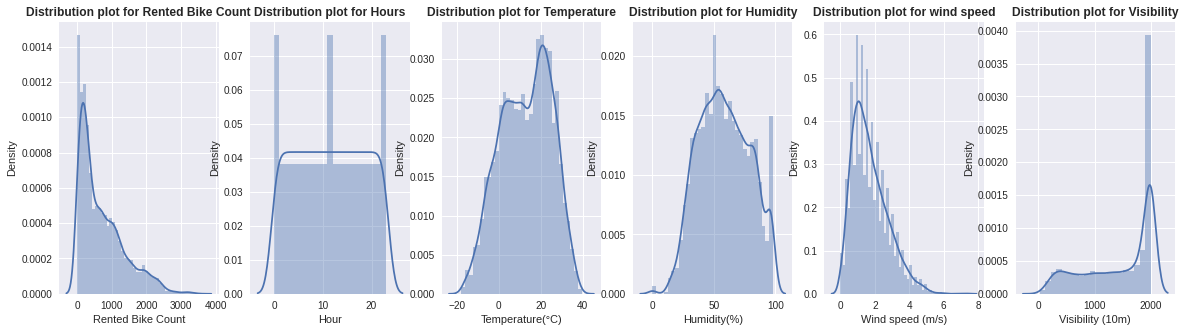

In [25]:
# using distplot to understand data distribution for various features
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
fig, ax = plt.subplots(1,6, figsize=(20,5))
sns.distplot(df1['Rented Bike Count'],ax=ax[0])
sns.distplot(df1['Hour'],ax=ax[1])
sns.distplot(df1['Temperature(°C)'],ax=ax[2])
sns.distplot(df1['Humidity(%)'],ax=ax[3])
sns.distplot(df1['Wind speed (m/s)'],ax=ax[4])
sns.distplot(df1['Visibility (10m)'],ax=ax[5])
ax[0].set_title("Distribution plot for Rented Bike Count",fontweight="bold")
ax[1].set_title("Distribution plot for Hours",fontweight="bold")
ax[2].set_title("Distribution plot for Temperature",fontweight="bold")
ax[3].set_title("Distribution plot for Humidity",fontweight="bold")
ax[4].set_title("Distribution plot for wind speed",fontweight="bold")
ax[5].set_title("Distribution plot for Visibility",fontweight="bold")
plt.show()

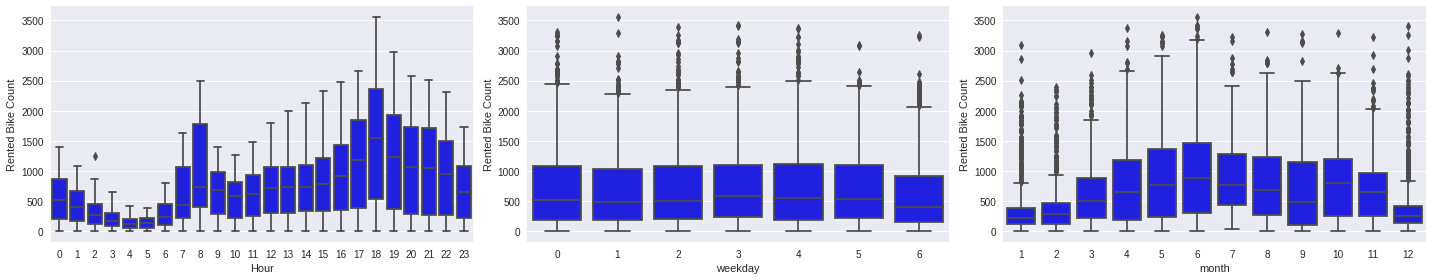

In [26]:
#Creating boxplot to visualize outliers present in features and target variable

def boxplotvar(column_name,ax_1):
  sns.boxplot(data=df1,y="Rented Bike Count",x=column_name,orient="v",ax=ax_1,color = 'blue')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,4))
boxplotvar('Hour',ax1)
boxplotvar('weekday',ax2)
boxplotvar('month',ax3)
fig.tight_layout() 

In [27]:
y= df1['Rented Bike Count']

In [28]:
X= df1.drop('Rented Bike Count', axis=True)

In [29]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,month,year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11,2018


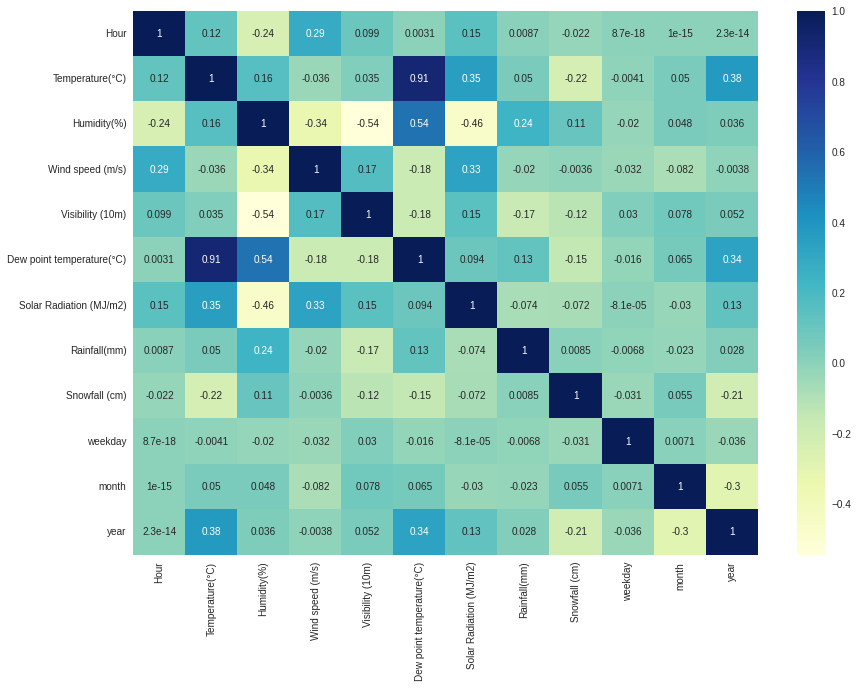

In [30]:
#finding correlation between various independent variables and plotting heatmap

correlation_calc = X.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

High correlation between :

1. Temperature and Seasons

2. Temperature and Dew Temperature

3. Dewpoint Temperature and seasons

4. Humidity and dew point temperature

In [31]:
data=df1.copy()

In [32]:
# Removing some columns from dataframe with high correlation

data.drop(columns=(['Dew point temperature(°C)','Seasons','Humidity(%)']),axis=True,inplace =True)


In [33]:
data

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekday,month,year
0,254,0,-5.2,2.2,2000,0.0,0.0,0.0,No Holiday,Yes,3,1,2017
1,204,1,-5.5,0.8,2000,0.0,0.0,0.0,No Holiday,Yes,3,1,2017
2,173,2,-6.0,1.0,2000,0.0,0.0,0.0,No Holiday,Yes,3,1,2017
3,107,3,-6.2,0.9,2000,0.0,0.0,0.0,No Holiday,Yes,3,1,2017
4,78,4,-6.0,2.3,2000,0.0,0.0,0.0,No Holiday,Yes,3,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,0.0,No Holiday,Yes,4,11,2018
8756,764,20,3.4,2.3,2000,0.0,0.0,0.0,No Holiday,Yes,4,11,2018
8757,694,21,2.6,0.3,1968,0.0,0.0,0.0,No Holiday,Yes,4,11,2018
8758,712,22,2.1,1.0,1859,0.0,0.0,0.0,No Holiday,Yes,4,11,2018
